In [43]:
import pandas as pd
df = pd.read_csv('Employee.csv')
df.head()

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
0,Bachelors,2017,Bangalore,3,34,Male,No,0,0
1,Bachelors,2013,Pune,1,28,Female,No,3,1
2,Bachelors,2014,New Delhi,3,38,Female,No,2,0
3,Masters,2016,Bangalore,3,27,Male,No,5,1
4,Masters,2017,Pune,3,24,Male,Yes,2,1


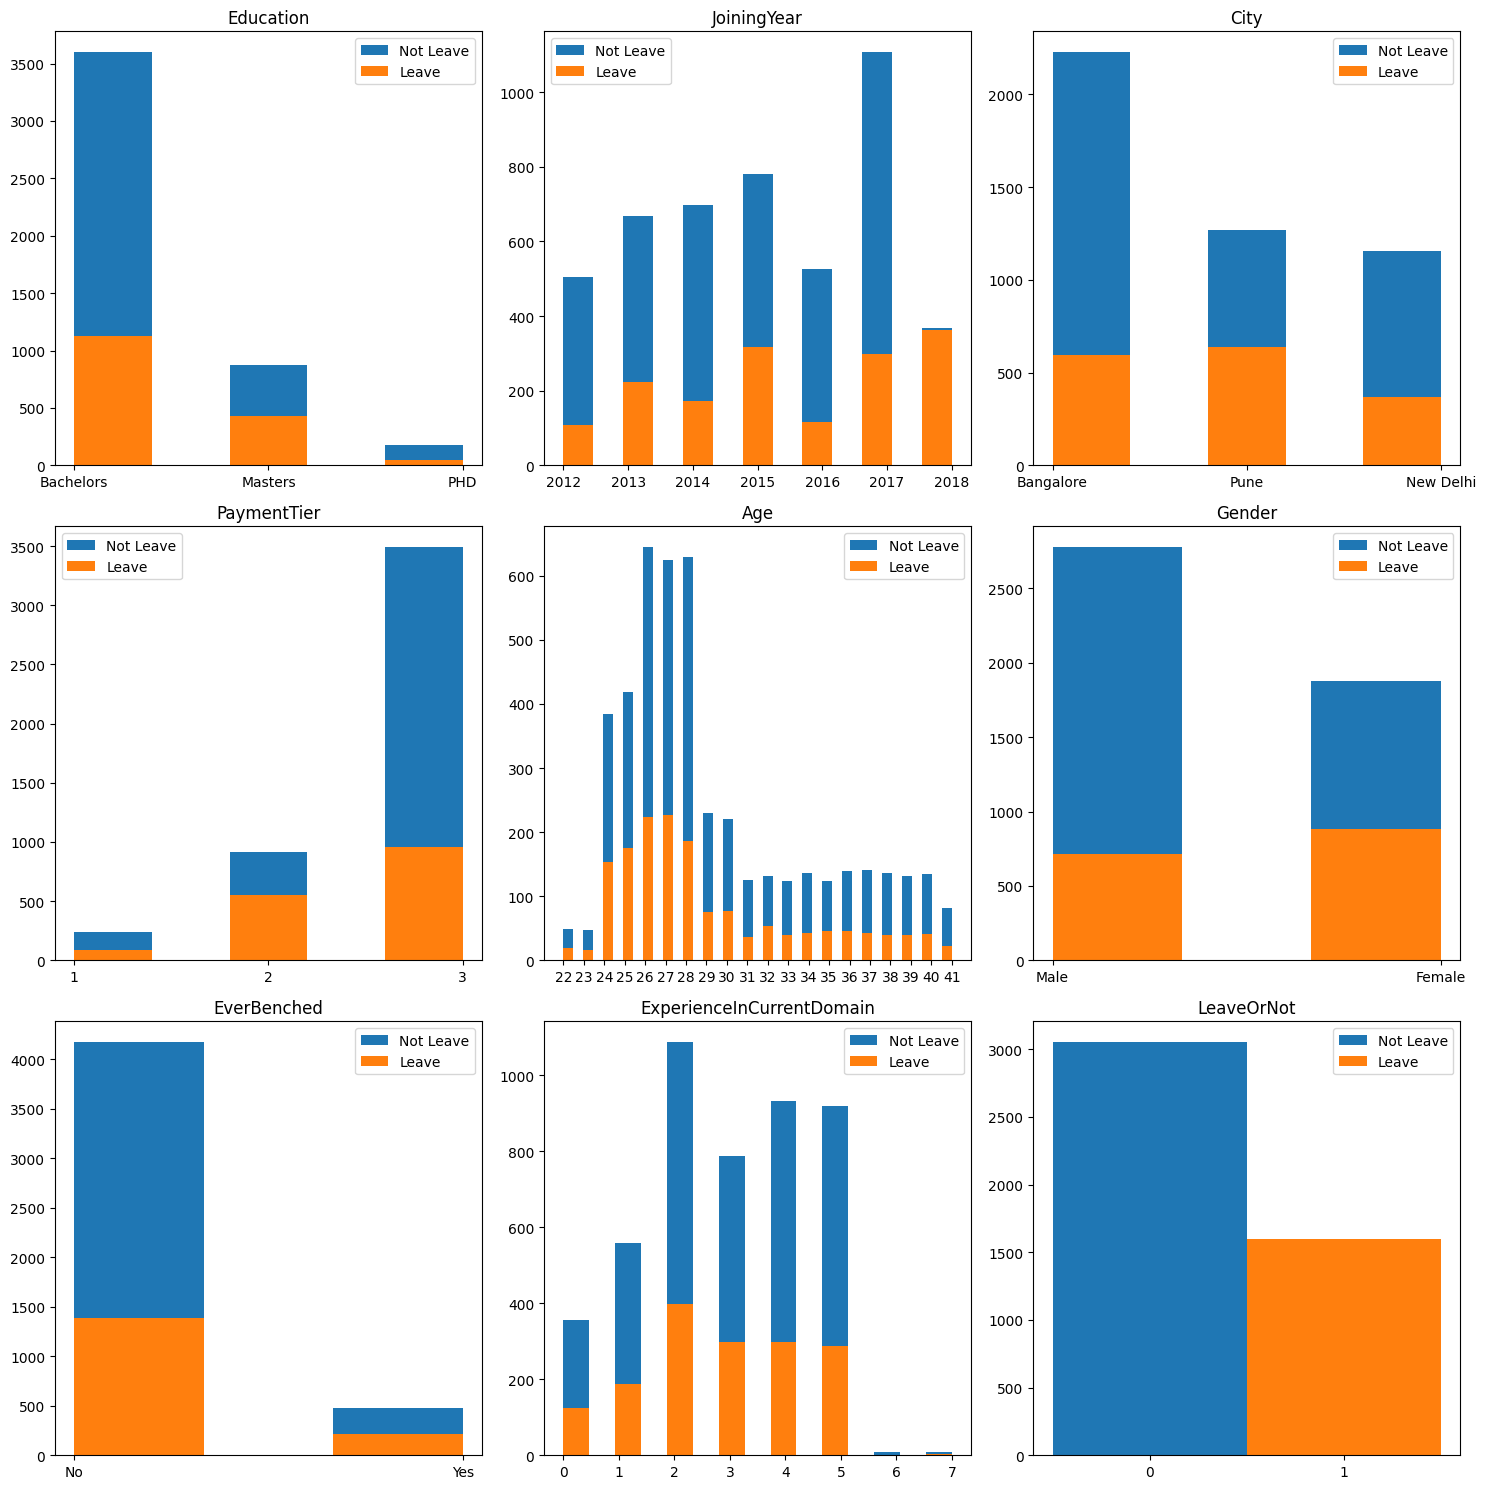

In [44]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(3, 3, figsize=(15, 15))

target_classes = df[df.columns[-1]].unique()
custom_labels = {0: 'Not Leave', 1: 'Leave'}  

# Lặp qua từng features
for (i, column) in enumerate(df.columns):
    
    ax = axs[i//3, i%3]
    ax.set_title(column)
    unique_vals = len(df[column].unique())

    if i != 8:
        # Vẽ tổng dữ liệu
        label = 0
        data = df[column]
        ax.hist(data, bins=unique_vals*2 - 1, alpha=1, label=custom_labels.get(label, str(label)))

        # Vẽ dữ liệu có label = 1
        label = 1
        data = df[df[df.columns[-1]] == 1][column]
        ax.hist(data, bins=unique_vals*2 - 1, alpha=1, label=custom_labels.get(label, str(label)))

    else:
        for label in target_classes:
            data = df[df[df.columns[-1]] == label][column]
            ax.hist(data, bins=1, alpha=1, label=custom_labels.get(label, str(label)))

    ax.set_xticks(df[column].unique())
    ax.set_xticklabels(df[column].unique())
    ax.legend()

plt.tight_layout()
plt.show()

In [45]:
df.describe(include='all')

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
count,4653,4653.000000,4653,4653.000000,4653.000000,4653,4653,4653.000000,4653.000000
unique,3,NaN,3,NaN,NaN,2,2,NaN,NaN
top,Bachelors,NaN,Bangalore,NaN,NaN,Male,No,NaN,NaN
freq,3601,NaN,2228,NaN,NaN,2778,4175,NaN,NaN
mean,NaN,2015.062970,NaN,2.698259,29.393295,NaN,NaN,2.905652,0.343864
std,NaN,1.863377,NaN,0.561435,4.826087,NaN,NaN,1.558240,0.475047
min,NaN,2012.000000,NaN,1.000000,22.000000,NaN,NaN,0.000000,0.000000
25%,NaN,2013.000000,NaN,3.000000,26.000000,NaN,NaN,2.000000,0.000000
50%,NaN,2015.000000,NaN,3.000000,28.000000,NaN,NaN,3.000000,0.000000
75%,NaN,2017.000000,NaN,3.000000,32.000000,NaN,NaN,4.000000,1.000000


In [46]:
# Payment Tier nghỉ việc cao nhất ở từng độ tuổi
grouped = df.groupby(['Age', 'PaymentTier'])['LeaveOrNot'].mean().reset_index()
highest_leave_tier = grouped.loc[grouped.groupby('Age')['LeaveOrNot'].idxmax()]
print(highest_leave_tier)

    Age  PaymentTier  LeaveOrNot
0    22            1    1.000000
4    23            2    0.777778
7    24            2    0.753425
10   25            2    0.724138
13   26            2    0.575758
16   27            2    0.618321
19   28            2    0.512195
22   29            2    0.630435
25   30            2    0.500000
27   31            1    0.500000
30   32            1    0.800000
33   33            1    0.600000
37   34            2    0.640000
40   35            2    0.560000
43   36            2    0.514286
46   37            2    0.555556
49   38            2    0.588235
52   39            2    0.520000
55   40            2    0.444444
58   41            2    0.533333


In [47]:
# Payment Tier theo từng thành phố
PaymentTier_by_City = df.groupby(['City'])['PaymentTier'].mean().reset_index()
print(PaymentTier_by_City)

# Tỉ lệ nghỉ việc theo Payment Tier ở từng thành phố
Leave_by_PaymentTier_in_Cities = df.groupby(['City', 'PaymentTier'])['LeaveOrNot'].mean().reset_index()
print(Leave_by_PaymentTier_in_Cities)

        City  PaymentTier
0  Bangalore     2.870287
1  New Delhi     2.598099
2       Pune     2.487382
        City  PaymentTier  LeaveOrNot
0  Bangalore            1    0.178571
1  Bangalore            2    0.707692
2  Bangalore            3    0.257923
3  New Delhi            1    0.357143
4  New Delhi            2    0.376771
5  New Delhi            3    0.284759
6       Pune            1    0.653333
7       Pune            2    0.742000
8       Pune            3    0.316017


# Preprocessing

In [48]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler

# Drop duplicate samples
df.nunique()
df.drop_duplicates(inplace=True)

# Encode categorical data
names = df.columns
types = df.dtypes

le = LabelEncoder()
for i in range(len(types)):
    if types[i] == 'object':
        df[names[i]] = le.fit_transform(df[names[i]])

X = df.values[:,:-1]
y = df.values[:,-1]

X_train, X_test, y_train, y_test = train_test_split(X, y,random_state=42)

# Normalize data
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# from sklearn.svm import SVC
# from sklearn.feature_selection import RFE
# svc = SVC(kernel="linear", C=1)
# rfe = RFE(estimator=svc, n_features_to_select=8, step=2)

# X_train = rfe.fit_transform(X_train, y_train)
# ranking = rfe.ranking_
# X_test = rfe.transform(X_test)

print('Data:')
print(X.shape)
print(y.shape)

print('Train:')
print(X_train.shape)
print(y_train.shape)

print('Test:')
print(X_test.shape)
print(y_test.shape)

Data:
(2764, 8)
(2764,)
Train:
(2073, 8)
(2073,)
Test:
(691, 8)
(691,)


# Feed Forward Neural Network

In [49]:
from tensorflow import keras
from keras import layers

ffnn = keras.Sequential([
    layers.Dense(128, activation="relu", input_shape=(X_train.shape[1],)),
    layers.Dense(64, activation="relu"),
    layers.Dense(32, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(8, activation="relu"),
    layers.Dense(1, activation="sigmoid"),
])

ffnn.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

result = ffnn.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=25, verbose=1)
with open('wrong_labeled.txt', 'w') as f:
    y_pred = ffnn.predict(X_test)
    for i in range(len(y_pred)):
        if (y_pred[i] > 0.5).astype(int) != y_test[i]:
            f.write(str(X_test[i]) + "label:" + str(y_test[i]) + str(y_pred[i]) + "\n")

Epoch 1/25
65/65 [==============================] - 1s 5ms/step - loss: 0.6547 - accuracy: 0.6223 - val_loss: 0.6262 - val_accuracy: 0.6758
Epoch 2/25
65/65 [==============================] - 0s 3ms/step - loss: 0.5952 - accuracy: 0.7000 - val_loss: 0.5856 - val_accuracy: 0.6961
Epoch 3/25
65/65 [==============================] - 0s 3ms/step - loss: 0.5630 - accuracy: 0.7139 - val_loss: 0.5477 - val_accuracy: 0.7366
Epoch 4/25
65/65 [==============================] - 0s 3ms/step - loss: 0.5458 - accuracy: 0.7212 - val_loss: 0.5829 - val_accuracy: 0.7004
Epoch 5/25
65/65 [==============================] - 0s 3ms/step - loss: 0.5432 - accuracy: 0.7270 - val_loss: 0.5264 - val_accuracy: 0.7438
Epoch 6/25
65/65 [==============================] - 0s 3ms/step - loss: 0.5267 - accuracy: 0.7448 - val_loss: 0.5269 - val_accuracy: 0.7381
Epoch 7/25
65/65 [==============================] - 0s 3ms/step - loss: 0.5132 - accuracy: 0.7506 - val_loss: 0.5097 - val_accuracy: 0.7525
Epoch 8/25
65/65 [==

# Avoid Overfitting for FFNN

In [50]:
from tensorflow import keras
from keras.callbacks import EarlyStopping
from keras import regularizers
from keras import layers

ffnn = keras.Sequential([
    layers.Dense(64, activation="relu", input_shape=(X_train.shape[1],),
                kernel_regularizer=regularizers.l1(0.01),
                activity_regularizer=regularizers.l2(0.01)),

    layers.Dense(32, activation="relu",
                kernel_regularizer=regularizers.l1(0.01),
                activity_regularizer=regularizers.l2(0.01)),

    layers.Dropout(0.5),

    layers.Dense(1, activation="sigmoid",
                kernel_regularizer=regularizers.l1(0.01),
                activity_regularizer=regularizers.l2(0.01)),
])

ffnn.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])
callbacks = [EarlyStopping(monitor='accuracy', patience=5)]
result = ffnn.fit(X_train, y_train, epochs=25, validation_data=(X_test, y_test), verbose=1, callbacks=callbacks)

Epoch 1/25
65/65 [==============================] - 1s 6ms/step - loss: 3.3274 - accuracy: 0.5842 - val_loss: 2.6463 - val_accuracy: 0.6006
Epoch 2/25
65/65 [==============================] - 0s 3ms/step - loss: 2.1307 - accuracy: 0.6155 - val_loss: 1.6643 - val_accuracy: 0.5991
Epoch 3/25
65/65 [==============================] - 0s 3ms/step - loss: 1.3339 - accuracy: 0.6088 - val_loss: 1.0509 - val_accuracy: 0.5991
Epoch 4/25
65/65 [==============================] - 0s 3ms/step - loss: 0.8908 - accuracy: 0.6088 - val_loss: 0.7873 - val_accuracy: 0.5991
Epoch 5/25
65/65 [==============================] - 0s 3ms/step - loss: 0.7444 - accuracy: 0.6088 - val_loss: 0.7213 - val_accuracy: 0.5991
Epoch 6/25
65/65 [==============================] - 0s 3ms/step - loss: 0.7078 - accuracy: 0.6088 - val_loss: 0.7019 - val_accuracy: 0.5991
Epoch 7/25
65/65 [==============================] - 0s 3ms/step - loss: 0.6945 - accuracy: 0.6088 - val_loss: 0.6939 - val_accuracy: 0.5991


# Recurrent Neural Network

In [51]:
from tensorflow import keras
from keras import layers

X_train = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_test = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))

inp_shape = (X_train.shape[1], X_train.shape[2])

rnn = keras.Sequential([
    layers.SimpleRNN(64, activation='relu', input_shape=inp_shape, return_sequences=True),
    layers.SimpleRNN(32, activation='relu'),
    layers.Dense(1, activation='sigmoid'),
])

rnn.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

result = rnn.fit(X_train, y_train, epochs=25, validation_data=(X_test, y_test), verbose=1)

Epoch 1/25
65/65 [==============================] - 2s 7ms/step - loss: 0.6580 - accuracy: 0.6112 - val_loss: 0.6471 - val_accuracy: 0.6469
Epoch 2/25
65/65 [==============================] - 0s 3ms/step - loss: 0.6341 - accuracy: 0.6662 - val_loss: 0.6294 - val_accuracy: 0.6512
Epoch 3/25
65/65 [==============================] - 0s 3ms/step - loss: 0.6200 - accuracy: 0.6763 - val_loss: 0.6154 - val_accuracy: 0.6686
Epoch 4/25
65/65 [==============================] - 0s 3ms/step - loss: 0.6055 - accuracy: 0.6855 - val_loss: 0.6029 - val_accuracy: 0.6802
Epoch 5/25
65/65 [==============================] - 0s 4ms/step - loss: 0.5934 - accuracy: 0.6879 - val_loss: 0.5899 - val_accuracy: 0.6903
Epoch 6/25
65/65 [==============================] - 0s 4ms/step - loss: 0.5792 - accuracy: 0.7038 - val_loss: 0.5783 - val_accuracy: 0.7004
Epoch 7/25
65/65 [==============================] - 0s 4ms/step - loss: 0.5652 - accuracy: 0.7130 - val_loss: 0.5669 - val_accuracy: 0.7120
Epoch 8/25
65/65 [==

# Avoid Overfitting for RNN

In [52]:
from tensorflow import keras
from keras.callbacks import EarlyStopping
from keras import regularizers
from keras import layers

rnn = keras.Sequential([
    layers.SimpleRNN(64, activation="relu", input_shape=inp_shape, return_sequences=True,
                kernel_regularizer=regularizers.l1(0.01),
                activity_regularizer=regularizers.l2(0.01)),

    layers.SimpleRNN(32, activation="relu",
                kernel_regularizer=regularizers.l1(0.01),
                activity_regularizer=regularizers.l2(0.01)),

    layers.Dropout(0.5),

    layers.Dense(1, activation="sigmoid",
                kernel_regularizer=regularizers.l1(0.01),
                activity_regularizer=regularizers.l2(0.01)),
])

rnn.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])
callbacks = [EarlyStopping(monitor='accuracy', patience=5)]
result = rnn.fit(X_train, y_train, epochs=25, validation_data=(X_test, y_test), verbose=1, callbacks=callbacks)

Epoch 1/25
65/65 [==============================] - 2s 8ms/step - loss: 3.3499 - accuracy: 0.6083 - val_loss: 2.6665 - val_accuracy: 0.5991
Epoch 2/25
65/65 [==============================] - 0s 4ms/step - loss: 2.1331 - accuracy: 0.6126 - val_loss: 1.6467 - val_accuracy: 0.5991
Epoch 3/25
65/65 [==============================] - 0s 4ms/step - loss: 1.3025 - accuracy: 0.6088 - val_loss: 1.0168 - val_accuracy: 0.5991
Epoch 4/25
65/65 [==============================] - 0s 4ms/step - loss: 0.8615 - accuracy: 0.6088 - val_loss: 0.7676 - val_accuracy: 0.5991
Epoch 5/25
65/65 [==============================] - 0s 4ms/step - loss: 0.7364 - accuracy: 0.6088 - val_loss: 0.7175 - val_accuracy: 0.5991
Epoch 6/25
65/65 [==============================] - 0s 3ms/step - loss: 0.7047 - accuracy: 0.6088 - val_loss: 0.7008 - val_accuracy: 0.5991
Epoch 7/25
65/65 [==============================] - 0s 4ms/step - loss: 0.6949 - accuracy: 0.6088 - val_loss: 0.6937 - val_accuracy: 0.5991
